**Linear Regression**


### Importing Relevent library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [24]:
# loading the data
car = pd.read_csv('Car_preproccesed.csv')

car.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear Regression


In [25]:
# Declareig the feature and target variable
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3867, 17), (3867,))

### Scaling the data


Note: It is not alwayes consider best practics to scale the dummy variable.beause once they scale they lose all the information. but here I will  neglect that. and will consider every column are seperate features.

In [26]:
from sklearn.preprocessing import StandardScaler

# create instance of scaler
scaler = StandardScaler()

# scaling the data
X_scaled = scaler.fit_transform(X)

X_scaled


array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]], shape=(3867, 17))

In [27]:
# checking the first row of scaling data.
X_scaled[0] # here i can see that all dummies `0` and `1` are gone.

array([ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

### train_test_split


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 17), (3093,), (774, 17), (774,))

In [29]:
# Creating the regression 
from sklearn.linear_model import LinearRegression

# create instane of model
reg = LinearRegression()

# fit the datab
model = reg.fit(X_train, y_train)

Predicting Values

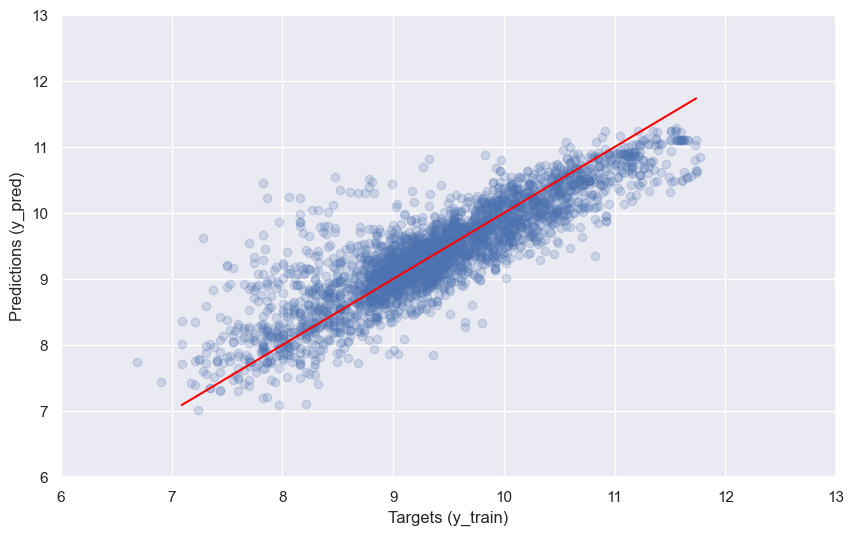

In [30]:
# Evaluate the base Linear regression model

# check the prediction with the original values
y_pred_train = reg.predict(X_train)
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')

plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The traning prediction looks good, it is not completely random, i can observe the linearity on the plot

Another way to check the `Residual` which is difference between thetargets and the predictions.

Text(0.5, 1.0, 'Traning Residual PDF')

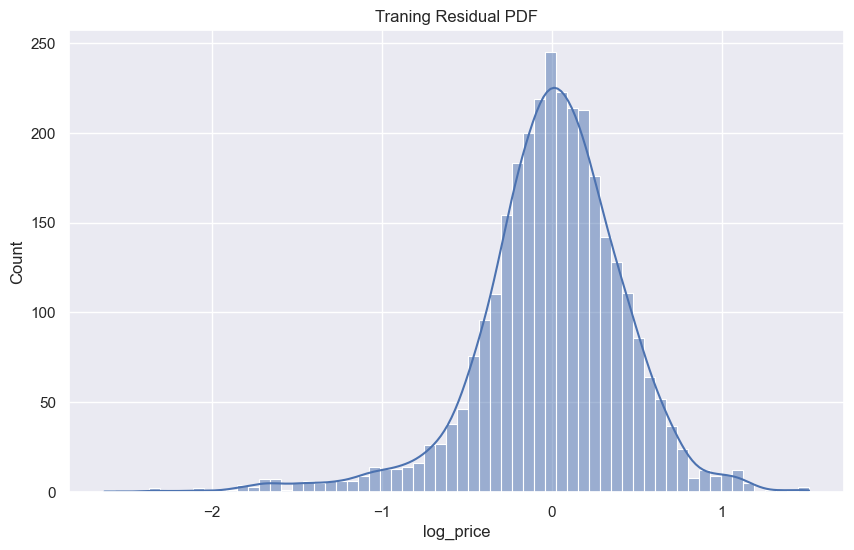

In [31]:
# plotting the distribution of the residual
residual_train = (y_train - y_pred_train)

# ploting the distribution of the residual
plt.figure(figsize=(10,6))
sns.histplot(residual_train,kde=True)
plt.title('Traning Residual PDF')

From this plot i can observe that the most of the value are lie on the near `0` as the mean is `0` i meaas the model is worked better, as most of the difference is `0`, the model is make the prediction as it is on the target value.

In [32]:
# Checking the r2_score
from sklearn.metrics import r2_score

r2_lr=r2_score(y_train, y_pred_train)

In [54]:
# Checkinht the rmse
from sklearn.metrics import mean_absolute_error

mae_lr= (mean_absolute_error(np.exp(y_train), np.exp(y_pred_train)))

The min and max price was `800` and `129222` on the data set and our model make error `10165`. 

The model i have created is not excelent but also not that much bad.

Our model is defining 75% of the variability from the data.

In [55]:
# checking the rmse on test data
y_pred_test=reg.predict(X_test)
rmse_lr= np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))

### Now i will look at the weight and bias


In [56]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.462515
1,EngineV,0.213625
2,Brand_BMW,0.025071
3,Brand_Mercedes-Benz,0.023430
4,Brand_Mitsubishi,-0.128286
5,Brand_Renault,-0.174282
6,Brand_Toyota,-0.048213
7,Brand_Volkswagen,-0.077236
8,Body_hatch,-0.147790
9,Body_other,-0.103041


This model is no longer fully generalized since we violated a key rule by scaling the dummy variables. However, we can still interpret the obtained weights.  

- **Positive Weights**: When the value of these features increases, the price also increases.  
- **Negative Weights**: When the value of these features increases, the price decreases.  

I'll now explain the specific weights and their impact on price.

## Now evaluate on Testing data

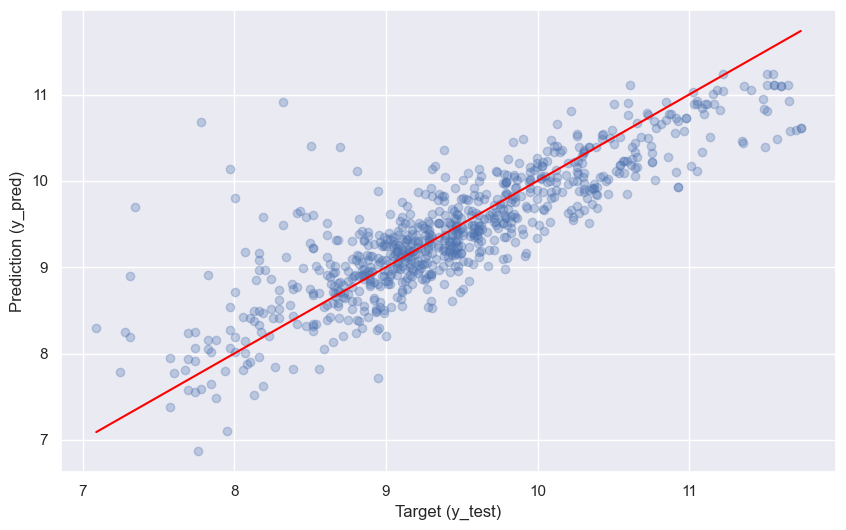

In [57]:
# predict on test data

y_pred = reg.predict(X_test)

# potting the graph
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')

plt.xlabel('Target (y_test)')
plt.ylabel('Prediction (y_pred)')
plt.show()

In [58]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction']) # np.exp will reverse the log_tranformation 
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = np.exp(y_test)

# checking the performance data 
df_eval.head(10)

,Prediction,Tareget
0,18328.250265,19000.0
1,5256.283391,5500.0
2,22185.025441,19200.0
3,10102.190466,11900.0
4,4000.490570,7750.0
5,22253.926804,13500.0
6,14263.638083,12700.0
7,20584.979127,55555.0
8,7309.370205,1500.0
9,8336.266935,11000.0


In [59]:
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)

# checking the data performance
df_eval.head(10)

,Prediction,Tareget,Residual,Difference%
0,18328.250265,19000.0,671.749735,3.535525
1,5256.283391,5500.0,243.716609,4.431211
2,22185.025441,19200.0,-2985.025441,15.547008
3,10102.190466,11900.0,1797.809534,15.107643
4,4000.490570,7750.0,3749.509430,48.380767
5,22253.926804,13500.0,-8753.926804,64.843902
6,14263.638083,12700.0,-1563.638083,12.312111
7,20584.979127,55555.0,34970.020873,62.946667
8,7309.370205,1500.0,-5809.370205,387.291347
9,8336.266935,11000.0,2663.733065,24.215755


Now this table tell a lot.

In [60]:
df_eval.tail(10)

,Prediction,Tareget,Residual,Difference%
764,1960.373916,2199.0,238.626084,10.851573
765,5424.003234,7800.0,2375.996766,30.461497
766,21887.907343,23900.0,2012.092657,8.418798
767,8913.066237,6500.0,-2413.066237,37.124096
768,18082.468236,30500.0,12417.531764,40.713219
769,39166.491984,116500.0,77333.508016,66.380694
770,6060.759191,13200.0,7139.240809,54.085158
771,15649.805091,27500.0,11850.194909,43.091618
772,11164.302749,16500.0,5335.697251,32.337559
773,11114.913153,11900.0,785.086847,6.597368


In [61]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16194.846830,18602.017829,2407.171000,39.109058
std,13265.843148,20139.559184,11449.213563,97.373331
min,964.002758,1200.000000,-50811.547159,0.101011
25%,7763.585673,7500.000000,-1827.305347,11.626478
50%,11715.376533,11900.000000,499.370435,22.999212
75%,20275.681146,20999.060000,3512.480615,39.073044
max,76339.579559,125000.000000,84484.674575,1715.173190


In [62]:
# # getting all values.
# pd.options.display.max_rows = 999
# # setting all value two digits after dot.
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df_eval.sort_values(by=['Difference%'])

A key observation here is that the largest differences occur in lower-priced cars. The residuals are all negative, meaning the model consistently overestimates prices.  

From the **Residual PDF plot**, the tail is on the negative side, reinforcing this pattern. This suggests the model is missing something—specifically, it predicts higher prices than the actual values for some cars.  

Possible reasons for this discrepancy:  
1. **The removed `Model` column** – Some car models may have a significant impact on price, which the model is now unable to capture.  
2. **Missing condition-related data** – If a car is damaged, has high repair costs, or other hidden defects, the price will be lower. Since we don’t have this information, the model cannot account for it.  

This insight suggests the need to revisit feature selection or incorporate additional data.

The next thing is creating another model and keep the `Model` Column

In [64]:
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'MAE': [mae_lr],
    'RMSE': [rmse_lr],
    'R² Score': [r2_lr]
})

metrics_df

,Model,MAE,RMSE,R² Score
0,Linear Regression,5421.250707,11692.288212,0.757289
